In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
file_path = "/content/drive/MyDrive/vehicles.csv"  # Adjust if needed

df = pd.read_csv(file_path, low_memory=False)
print(f"✅ Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

✅ Dataset loaded: 426,880 rows × 26 columns


In [ ]:
# Create a data dictionary overview
data_dict = pd.DataFrame({
    'Feature': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Null_Count': df.isnull().sum(),
    'Null_Percentage': round(df.isnull().sum() / len(df) * 100, 2),
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

data_dict.head(15)  # Display first 15 rows


,Feature,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values
id,id,int64,426880,0,0.00,426880
url,url,object,426880,0,0.00,426880
region,region,object,426880,0,0.00,404
region_url,region_url,object,426880,0,0.00,413
price,price,int64,426880,0,0.00,15655
year,year,float64,425675,1205,0.28,114
manufacturer,manufacturer,object,409234,17646,4.13,42
model,model,object,421603,5277,1.24,29667
condition,condition,object,252776,174104,40.79,6
cylinders,cylinders,object,249202,177678,41.62,8


In [ ]:
# Print human-readable descriptions for key features
print("1. DATA DICTIONARY")
print("--------------------------------------------------")
print("Feature Meanings and Data Types:")

# Descriptions for selected features
feature_meanings = {
    'price': 'Vehicle selling price (USD) - TARGET VARIABLE',
    'year': 'Manufacturing year of the vehicle',
    'manufacturer': 'Vehicle brand (Toyota, Ford, etc.)',
    'model': 'Specific vehicle model name',
    'condition': 'Vehicle condition rating',
    'cylinders': 'Number of engine cylinders',
    'fuel': 'Fuel type (gas, electric, hybrid, diesel)',
    'odometer': 'Vehicle mileage in miles',
    'title_status': 'Legal title status',
    'transmission': 'Transmission type (automatic/manual)',
    'drive': 'Drive system (fwd, rwd, 4wd)',
    'size': 'Vehicle size category',
    'type': 'Vehicle type (sedan, SUV, truck, etc.)',
    'paint_color': 'Exterior color',
    'state': 'State where vehicle is located'
}

# Loop and format output
for feature in df.columns:
    meaning = feature_meanings.get(feature, 'Additional feature')
    dtype = df[feature].dtype
    missing_pct = round(df[feature].isnull().sum() / len(df) * 100, 1)
    print(f"  {feature}: {meaning} | Type: {dtype} | Missing: {missing_pct}%")


1. DATA DICTIONARY
--------------------------------------------------
Feature Meanings and Data Types:
  id: Additional feature | Type: int64 | Missing: 0.0%
  url: Additional feature | Type: object | Missing: 0.0%
  region: Additional feature | Type: object | Missing: 0.0%
  region_url: Additional feature | Type: object | Missing: 0.0%
  price: Vehicle selling price (USD) - TARGET VARIABLE | Type: int64 | Missing: 0.0%
  year: Manufacturing year of the vehicle | Type: float64 | Missing: 0.0%
  manufacturer: Vehicle brand (Toyota, Ford, etc.) | Type: object | Missing: 3.9%
  model: Specific vehicle model name | Type: object | Missing: 1.2%
  condition: Vehicle condition rating | Type: object | Missing: 40.5%
  cylinders: Number of engine cylinders | Type: object | Missing: 41.5%
  fuel: Fuel type (gas, electric, hybrid, diesel) | Type: object | Missing: 0.5%
  odometer: Vehicle mileage in miles | Type: float64 | Missing: 0.0%
  title_status: Legal title status | Type: object | Missing:

In [ ]:
# Creating and sort missing data summary
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
}).sort_values('Missing_Percentage', ascending=False)

# Filter only rows with missing values
missing_summary_filtered = missing_summary[missing_summary['Missing_Count'] > 0]

# Print top 20 missing rows in formatted table
print("5. MISSING DATA & DATA QUALITY ANALYSIS")
print("--------------------------------------------------")
print("Missing Data Summary:")
print(missing_summary_filtered.head(20).to_string())

# Bucket by quality
high_quality = missing_summary[missing_summary['Missing_Percentage'] < 10]
medium_quality = missing_summary[(missing_summary['Missing_Percentage'] >= 10) & (missing_summary['Missing_Percentage'] < 50)]
low_quality = missing_summary[missing_summary['Missing_Percentage'] >= 50]

# Print quality counts
print("\nData Quality Assessment:")
print(f"  High Quality Features (>90% complete): {len(high_quality)}")
print(f"  Medium Quality Features (50-90% complete): {len(medium_quality)}")
print(f"  Low Quality Features (<50% complete): {len(low_quality)}")


5. MISSING DATA & DATA QUALITY ANALYSIS
--------------------------------------------------
Missing Data Summary:
              Missing_Count  Missing_Percentage Data_Type
county               421344              100.00   float64
size                 301612               71.58    object
cylinders            174759               41.48    object
condition            170493               40.46    object
VIN                  159323               37.81    object
drive                128849               30.58    object
paint_color          128090               30.40    object
type                  91782               21.78    object
manufacturer          16267                3.86    object
title_status           7358                1.75    object
lat                    6481                1.54   float64
long                   6481                1.54   float64
model                  5195                1.23    object
fuel                   2172                0.52    object
transmission     

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")
print(f"Duplicate percentage: {(duplicate_rows / len(df)) * 100:.2f}%")


Duplicate rows: 0
Duplicate percentage: 0.00%


In [ ]:
print("6. OUTLIERS & SUSPICIOUS DATA DETECTION")
print("--------------------------------------------------")

# Price
zero_price = (df['price'] == 0).sum()
neg_price = (df['price'] < 0).sum()
high_price = (df['price'] > 100000).sum()
low_price = ((df['price'] > 0) & (df['price'] < 1000)).sum()

print("Price Outliers:")
print(f"  Zero prices: {zero_price:,} ({(zero_price / len(df)) * 100:.1f}%)")
print(f"  Negative prices: {neg_price}")
print(f"  Extremely high (>$100k): {high_price}")
print(f"  Very low ($1-$1000): {low_price}")

# Year
future_years = (df['year'] > 2021).sum()
very_old = (df['year'] < 1900).sum()

print(f"\nYear Outliers:")
print(f"  Future years (>2021): {future_years}")
print(f"  Very old (<1900): {very_old}")

# Odometer
zero_miles = (df['odometer'] == 0).sum()
extreme_miles = (df['odometer'] > 500000).sum()

print(f"\nOdometer Outliers:")
print(f"  Zero miles: {zero_miles:,}")
print(f"  Extreme high (>500k): {extreme_miles:,}")

6. OUTLIERS & SUSPICIOUS DATA DETECTION
--------------------------------------------------
Price Outliers:
  Zero prices: 30,759 (7.3%)
  Negative prices: 0
  Extremely high (>$100k): 647
  Very low ($1-$1000): 13204

Year Outliers:
  Future years (>2021): 133
  Very old (<1900): 0

Odometer Outliers:
  Zero miles: 1,943
  Extreme high (>500k): 1,385


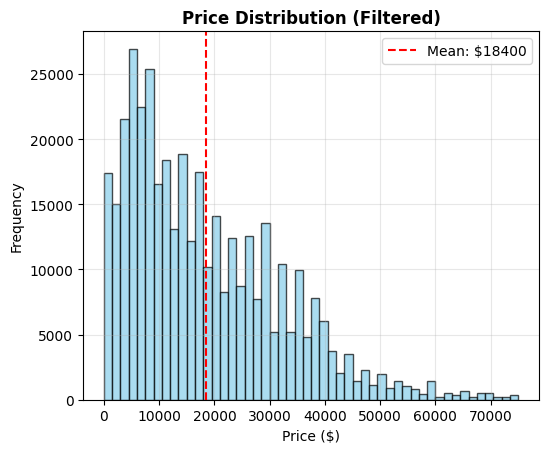

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create main visualization figure
fig = plt.figure(figsize=(20, 22))
# 1. Price Distribution
plt.subplot(4, 3, 1)
if 'price' in df.columns:
        valid_prices = df[(df['price'] > 0) & (df['price'] <= 75000)]['price']
        plt.hist(valid_prices, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title('Price Distribution (Filtered)', fontweight='bold')
        plt.xlabel('Price ($)')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        mean_price = valid_prices.mean()
        plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:.0f}')
        plt.legend()


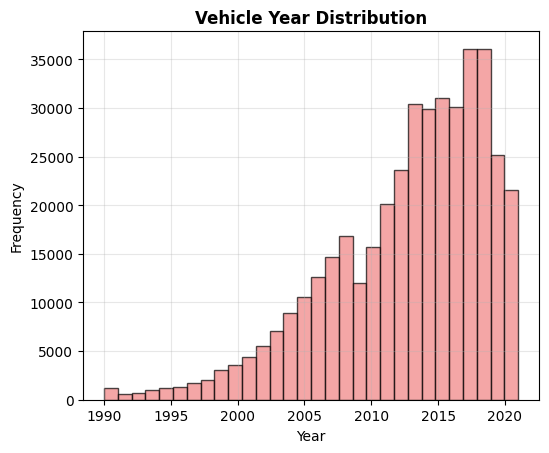

In [ ]:
# Create main visualization figure
fig = plt.figure(figsize=(20, 22))
# 2. Year Distribution
plt.subplot(4, 3, 2)
if 'year' in df.columns:
        valid_years = df[(df['year'] >= 1990) & (df['year'] <= 2021)]['year']
        plt.hist(valid_years, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
        plt.title('Vehicle Year Distribution', fontweight='bold')
        plt.xlabel('Year')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)


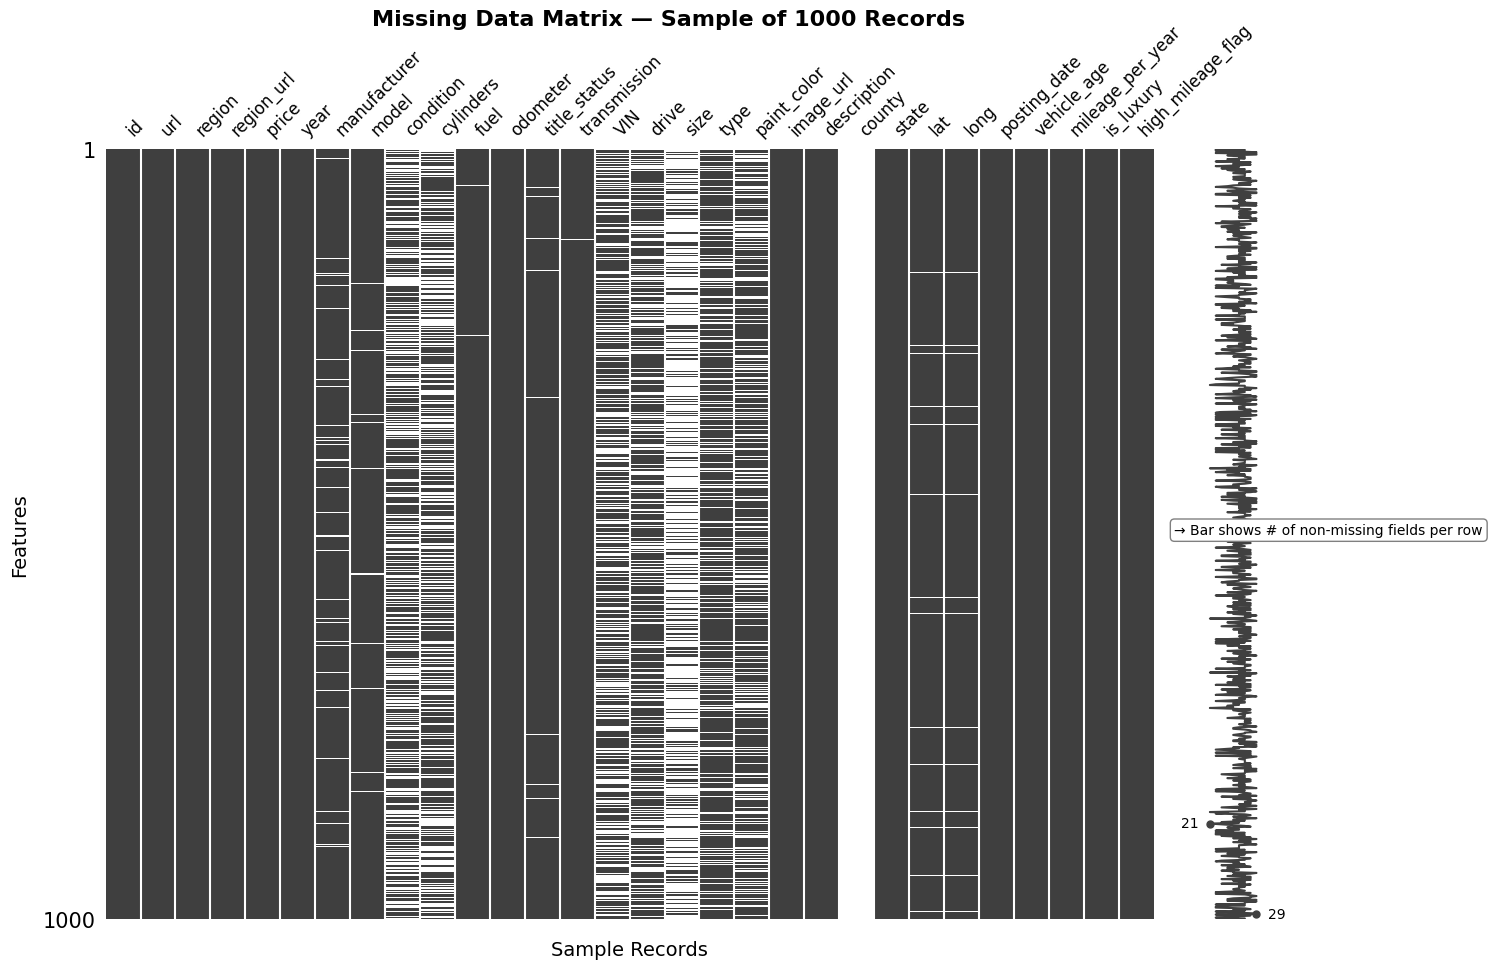

In [53]:
import missingno as msno
import matplotlib.pyplot as plt

# Plot directly with msno and then manually add labels
msno.matrix(df.sample(1000), figsize=(15, 10), fontsize=12)

# Add custom axis labels and title
plt.suptitle('Missing Data Matrix — Sample of 1000 Records', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Sample Records', fontsize=14, labelpad=15)
plt.ylabel('Features', fontsize=14, labelpad=10)

# Add annotation for right-side bar
plt.annotate('→ Bar shows # of non-missing fields per row',
             xy=(1.02, 0.5), xycoords='axes fraction',
             fontsize=10, backgroundcolor='lightyellow',
             bbox=dict(boxstyle="round", edgecolor='gray', facecolor='white'))

plt.tight_layout()
plt.show()



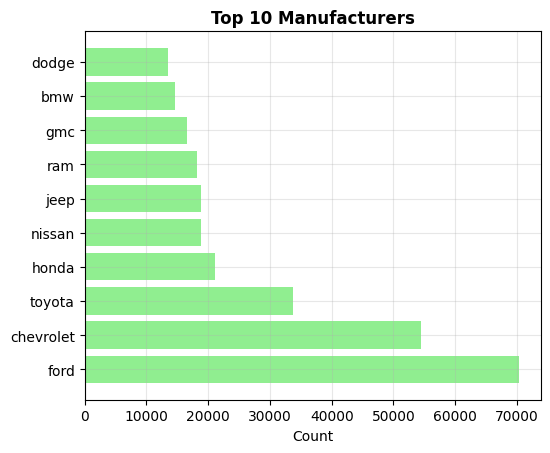

In [54]:
# Create main visualization figure
fig = plt.figure(figsize=(20, 22))
# 4. Top Manufacturers
plt.subplot(4, 3, 4)
if 'manufacturer' in df.columns:
        top_manufacturers = df['manufacturer'].value_counts().head(10)
        plt.barh(range(len(top_manufacturers)), top_manufacturers.values, color='lightgreen')
        plt.yticks(range(len(top_manufacturers)), top_manufacturers.index)
        plt.title('Top 10 Manufacturers', fontweight='bold')
        plt.xlabel('Count')
        plt.grid(True, alpha=0.3)

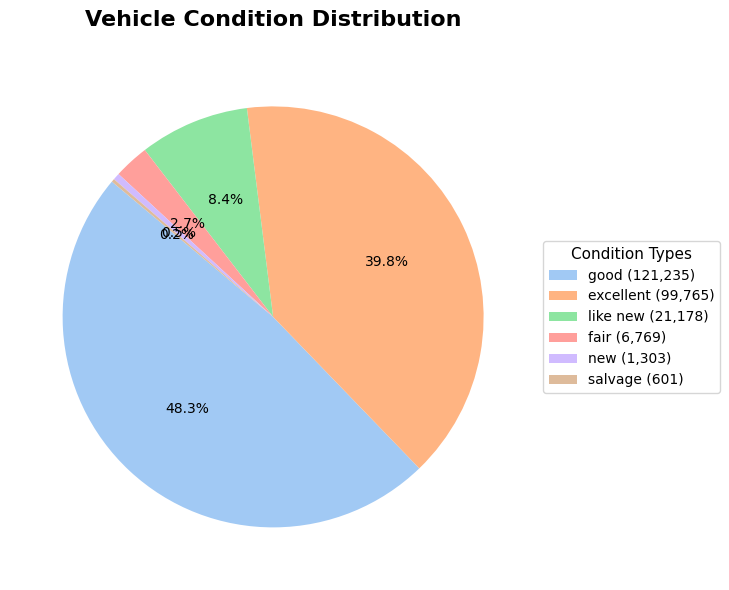

In [59]:
# Prepare data
condition_counts = df['condition'].value_counts()
labels = condition_counts.index
sizes = condition_counts.values
colors = sns.color_palette('pastel')[0:len(labels)]

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # Use legend instead
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops=dict(color="black", fontsize=10)
)

# Set title
ax.set_title('Vehicle Condition Distribution', fontsize=16, fontweight='bold', pad=20)

# Add legend outside the chart with label + count
legend_labels = [f"{label} ({count:,})" for label, count in zip(labels, sizes)]
ax.legend(wedges, legend_labels,
          title="Condition Types",
          loc="center left",
          bbox_to_anchor=(1, 0.5),
          fontsize=10,
          title_fontsize=11)

plt.tight_layout()
plt.show()

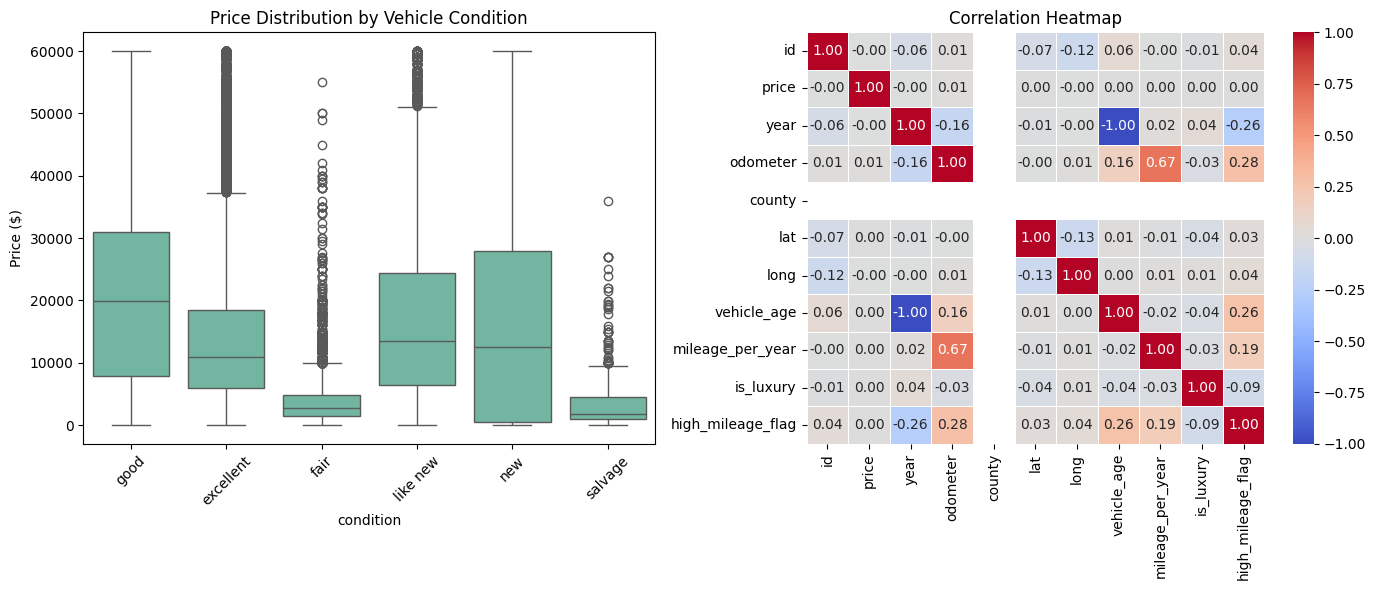

In [60]:
plt.figure(figsize=(14, 6))

# Box Plot: Price by Condition
plt.subplot(1, 2, 1)
sns.boxplot(data=df[df['price'] < 60000], x='condition', y='price')
plt.title('Price Distribution by Vehicle Condition')
plt.xticks(rotation=45)
plt.ylabel('Price ($)')

# Correlation Heatmap
plt.subplot(1, 2, 2)
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


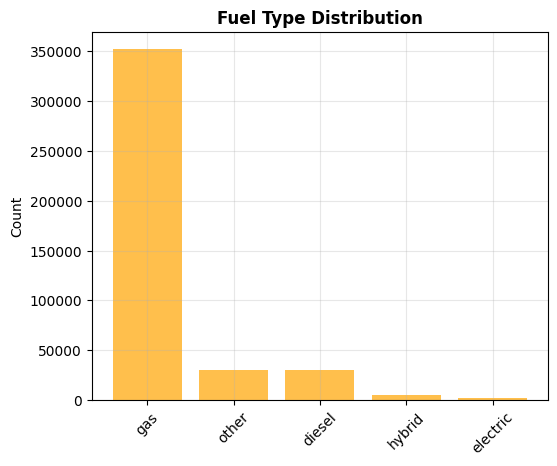

In [63]:
# Create main visualization figure
fig = plt.figure(figsize=(20, 22))
# 6. Fuel Type Distribution
plt.subplot(4, 3, 6)
if 'fuel' in df.columns:
        fuel_counts = df['fuel'].value_counts().head(6)
        plt.bar(fuel_counts.index, fuel_counts.values, color='orange', alpha=0.7)
        plt.title('Fuel Type Distribution', fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.grid(True, alpha=0.3)


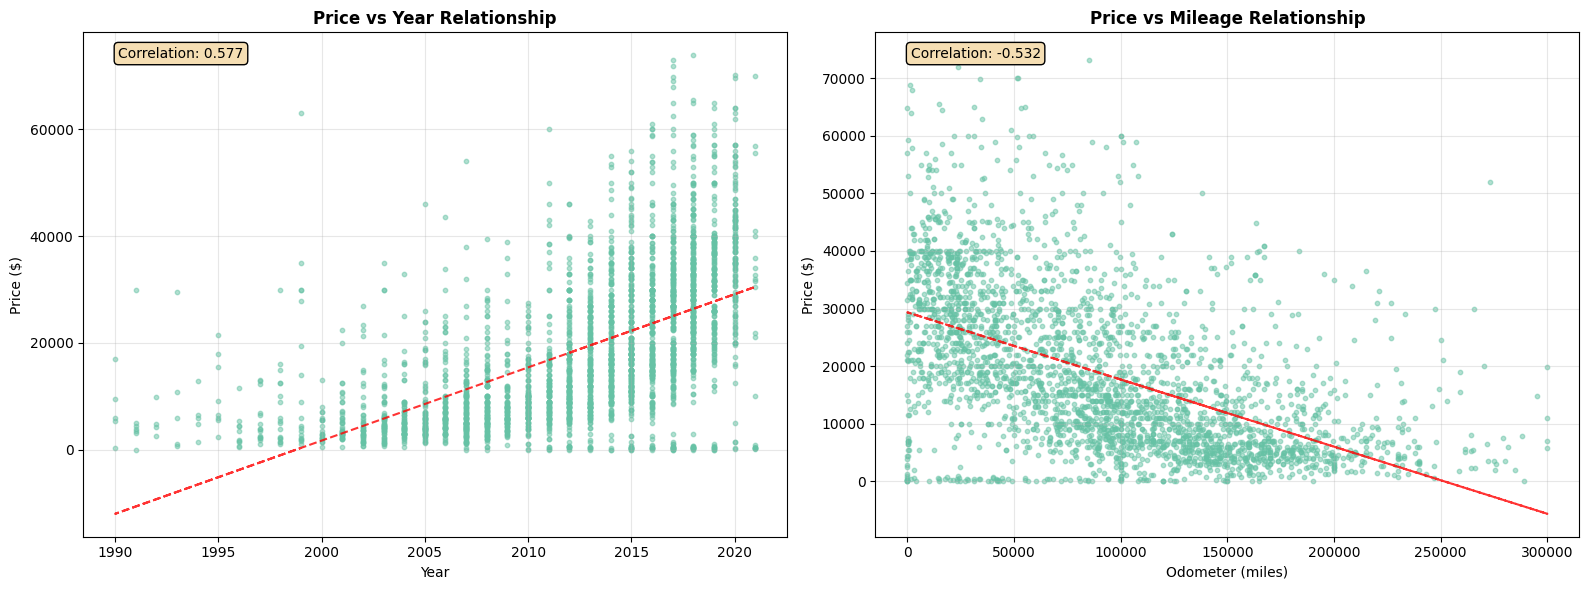

In [72]:
# Create shared figure and side-by-side axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --------------------------
# Left plot: Price vs Year
# --------------------------
sample_year = df[(df['price'] > 0) & (df['price'] <= 75000) &
                 (df['year'] >= 1990) & (df['year'] <= 2021)].sample(min(3000, len(df)))
ax1.scatter(sample_year['year'], sample_year['price'], alpha=0.5, s=10)
z = np.polyfit(sample_year['year'], sample_year['price'], 1)
p = np.poly1d(z)
ax1.plot(sample_year['year'], p(sample_year['year']), "r--", alpha=0.8)

ax1.set_title('Price vs Year Relationship', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.grid(True, alpha=0.3)
corr1 = sample_year['year'].corr(sample_year['price'])
ax1.text(0.05, 0.95, f'Correlation: {corr1:.3f}', transform=ax1.transAxes,
         bbox=dict(boxstyle="round", facecolor='wheat'))

# --------------------------
# Right plot: Price vs Odometer
# --------------------------
sample_odo = df[(df['price'] > 0) & (df['price'] <= 75000) &
                (df['odometer'] > 0) & (df['odometer'] <= 300000)].sample(min(3000, len(df)))
ax2.scatter(sample_odo['odometer'], sample_odo['price'], alpha=0.5, s=10)
z = np.polyfit(sample_odo['odometer'], sample_odo['price'], 1)
p = np.poly1d(z)
ax2.plot(sample_odo['odometer'], p(sample_odo['odometer']), "r--", alpha=0.8)

ax2.set_title('Price vs Mileage Relationship', fontweight='bold')
ax2.set_xlabel('Odometer (miles)')
ax2.set_ylabel('Price ($)')
ax2.grid(True, alpha=0.3)
corr2 = sample_odo['odometer'].corr(sample_odo['price'])
ax2.text(0.05, 0.95, f'Correlation: {corr2:.3f}', transform=ax2.transAxes,
         bbox=dict(boxstyle="round", facecolor='wheat'))

# Layout adjustment
plt.tight_layout()
plt.show()

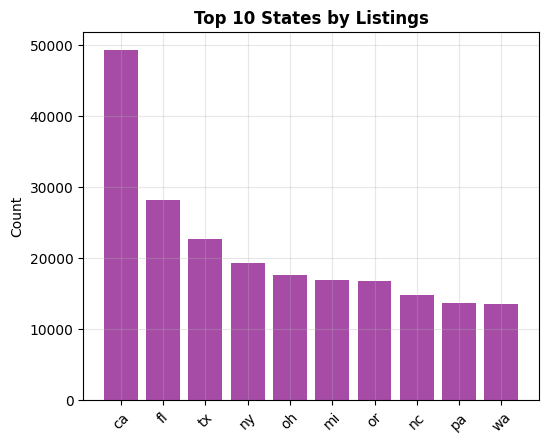

In [75]:
# Create main visualization figure
fig = plt.figure(figsize=(20, 22))
# 9. State Distribution
plt.subplot(4, 3, 9)
if 'state' in df.columns:
        top_states = df['state'].value_counts().head(10)
        plt.bar(top_states.index, top_states.values, color='purple', alpha=0.7)
        plt.title('Top 10 States by Listings', fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.grid(True, alpha=0.3)


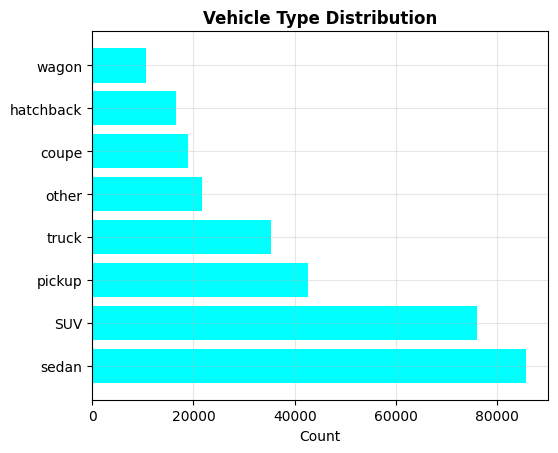

In [77]:
# Create main visualization figure
fig = plt.figure(figsize=(20, 22))
# 10. Vehicle Type Distribution
plt.subplot(4, 3, 10)
if 'type' in df.columns:
        type_counts = df['type'].value_counts().head(8)
        plt.barh(range(len(type_counts)), type_counts.values, color='cyan')
        plt.yticks(range(len(type_counts)), type_counts.index)
        plt.title('Vehicle Type Distribution', fontweight='bold')
        plt.xlabel('Count')
        plt.grid(True, alpha=0.3)


In [ ]:
# Clean and filter rows before engineering features
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

# Drop rows with missing year or odometer before feature creation
df = df[df['year'].notna()]
df = df[df['odometer'].notna()]


In [ ]:
# Add new feature: vehicle_age
df['vehicle_age'] = 2025 - df['year']

# Mileage per year (only where year & odometer are present)
df['mileage_per_year'] = df['odometer'] / df['vehicle_age']
df['mileage_per_year'] = df['mileage_per_year'].replace([np.inf, -np.inf], np.nan)

# Flag for luxury brands
luxury_brands = ['bmw', 'mercedes-benz', 'audi', 'lexus', 'cadillac']
df['is_luxury'] = df['manufacturer'].str.lower().isin(luxury_brands).astype(int)

# Flag for high mileage
df['high_mileage_flag'] = (df['odometer'] > 100000).astype(int)

# View engineered columns
df[['year', 'vehicle_age', 'mileage_per_year', 'is_luxury', 'high_mileage_flag']].head()


,year,vehicle_age,mileage_per_year,is_luxury,high_mileage_flag
27,2014.00,11.00,5265.73,0,0
28,2010.00,15.00,4748.60,0,0
29,2020.00,5.00,3832.00,0,0
30,2017.00,8.00,5140.50,0,0
31,2013.00,12.00,10666.67,0,1


In [ ]:
# Summary of price statistics (excluding $0 values)
valid_prices = df[df['price'] > 0]['price']
summary = {
    "mean_price": valid_prices.mean(),
    "median_price": valid_prices.median(),
    "std_price": valid_prices.std(),
    "min_price": valid_prices.min(),
    "max_price": valid_prices.max(),
    "num_listings": len(valid_prices)
}

for k, v in summary.items():
    print(f"{k}: ${v:,.2f}" if 'price' in k else f"{k}: {v}")

mean_price: $81,967.35
median_price: $15,000.00
std_price: $12,735,707.98
min_price: $1.00
max_price: $3,736,928,711.00
num_listings: 390585


In [80]:
!pip install streamlit plotly
import plotly.express as px
import streamlit as st

# Load or simulate your vehicle dataset
df = pd.read_csv("/content/drive/MyDrive/vehicles.csv")
np.random.seed(42)
df = pd.DataFrame({
    'price': np.random.randint(1000, 75000, 5000),
    'year': np.random.randint(1990, 2022, 5000),
    'odometer': np.random.randint(5000, 300000, 5000),
    'manufacturer': np.random.choice(['Ford', 'Toyota', 'BMW', 'Chevrolet', 'Honda'], 5000),
    'fuel': np.random.choice(['gas', 'diesel', 'electric', 'hybrid'], 5000),
    'condition': np.random.choice(['excellent', 'good', 'fair', 'like new'], 5000),
    'state': np.random.choice(['CA', 'TX', 'NY', 'FL', 'WA'], 5000),
})

st.set_page_config(layout="wide")
st.title("🚘 Vehicle Listings Dashboard")

# Row 1: Price & Manufacturer
col1, col2 = st.columns(2)
with col1:
    st.subheader("Price Distribution")
    fig1 = px.histogram(df[df['price'] <= 75000], x='price', nbins=40, color_discrete_sequence=['skyblue'])
    st.plotly_chart(fig1, use_container_width=True)

with col2:
    st.subheader("Top Manufacturers")
    top_mf = df['manufacturer'].value_counts().nlargest(10).reset_index()
    top_mf.columns = ['manufacturer', 'count']
    fig2 = px.bar(top_mf, x='manufacturer', y='count', text='count', color='manufacturer')
    st.plotly_chart(fig2, use_container_width=True)

# Row 2: Scatter plots
col3, col4 = st.columns(2)
with col3:
    st.subheader("Price vs Year")
    fig3 = px.scatter(df, x='year', y='price', opacity=0.5, trendline='ols')
    st.plotly_chart(fig3, use_container_width=True)

with col4:
    st.subheader("Price vs Odometer")
    fig4 = px.scatter(df, x='odometer', y='price', opacity=0.5, trendline='ols')
    st.plotly_chart(fig4, use_container_width=True)

# Row 3: Condition & Fuel
col5, col6 = st.columns(2)
with col5:
    st.subheader("Vehicle Condition Distribution")
    fig5 = px.pie(df, names='condition', hole=0.4, title='Condition Breakdown')
    st.plotly_chart(fig5, use_container_width=True)

with col6:
    st.subheader("Fuel Type Distribution")
    fuel_counts = df['fuel'].value_counts().reset_index()
    fuel_counts.columns = ['fuel_type', 'count']
    fig6 = px.bar(fuel_counts, x='fuel_type', y='count', color='fuel_type')
    st.plotly_chart(fig6, use_container_width=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


2025-05-27 23:12:32.904 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:12:33.170 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:12:33.672 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-27 23:12:33.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:12:33.684 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:12:33.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 23:12:33.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn